In [26]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf


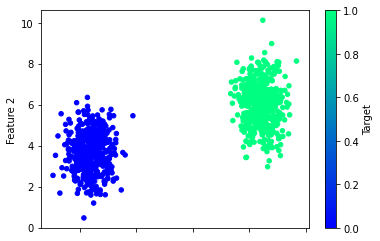

In [27]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [28]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [29]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [31]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [32]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [33]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 0.8253 - accuracy: 0.0668
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8125 - accuracy: 0.0000e+00
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7972 - accuracy: 0.0000e+00
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7808 - accuracy: 0.0000e+00
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7727 - accuracy: 0.0000e+00
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7615 - accuracy: 7.1008e-04
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7540 - accuracy: 8.2598e-04
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7418 - accuracy: 0.0106
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7375 - accuracy: 0.0211
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7300 - ac

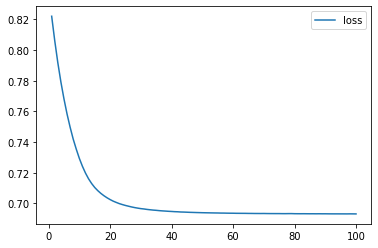

In [36]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

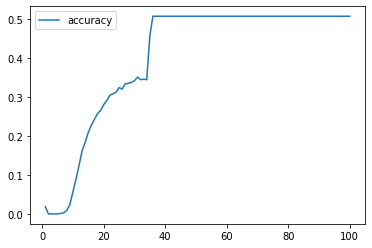

In [37]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [40]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.6937 - accuracy: 0.4800
Loss: 0.6937288045883179, Accuracy: 0.47999998927116394


In [41]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

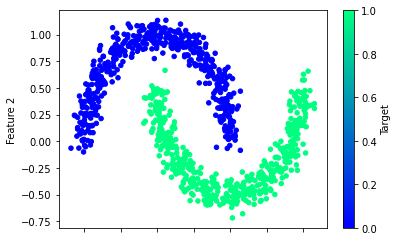

In [42]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [44]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [46]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2956 - accuracy: 0.8933
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.8920
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2942 - accuracy: 0.8920
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2936 - accuracy: 0.8920
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2930 - accuracy: 0.8933
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2923 - accuracy: 0.8933
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2918 - accuracy: 0.8933
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2912 - accuracy: 0.8933
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2907 - accuracy: 0.8933
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2901 - accuracy: 0.8933
Epoch 11/

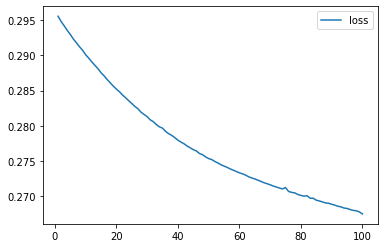

In [47]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

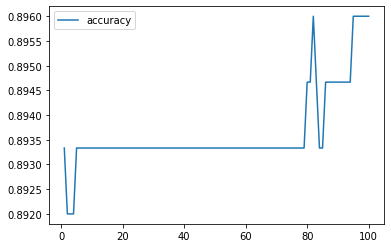

In [48]:
# Plot the loss
history_df.plot(y="accuracy")

In [50]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [51]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [53]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2349 - accuracy: 0.9026
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2279 - accuracy: 0.8970
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2278 - accuracy: 0.9014
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 0.9052
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2429 - accuracy: 0.8893
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1835 - accuracy: 0.9219
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2246 - accuracy: 0.9008
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2537 - accuracy: 0.8870
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2241 - accuracy: 0.8856
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2120 - accuracy: 0.9077
Epoch 11/